# OpenCV
OpenCV es una librería especializada en algoritmos y herramientas para visión artificial, ha sido elaborada en base a rutinas de procesamiento de imágenes optimizadas en C/C++.

Afortunadamente, existe una implementación en Python en la cual podemos usar la mayoría de sus funciones mediante arrays de numpy.


## Operaciones básicas

In [1]:
# importando el módulo
import numpy as np
import cv2


In [2]:
# leyendo una imagen desde un archivo (solamente local)
#lenna = cv2.imread('Lenna.png')


In [3]:
# descargando imágenes de internet
from skimage import io
# urls de las imagenes para descargar
urls = [
	"https://www.pyimagesearch.com/wp-content/uploads/2015/01/opencv_logo.png",
	"https://www.pyimagesearch.com/wp-content/uploads/2015/01/google_logo.png",
	"https://www.pyimagesearch.com/wp-content/uploads/2014/12/adrian_face_detection_sidebar.png",
]
lenna_url = "http://4.bp.blogspot.com/-mLOwpEsNL4Y/UCu0wcVsPBI/AAAAAAAAA6s/7ECKTpxXr3o/s1600/lena.bmp"
#descargar las imagenes
lenna = io.imread(lenna_url)


In [4]:
# la imagen simpmlemente es un array de numpy
print(lenna.shape)
print(lenna.size)
print(lenna.dtype)
# podemos acceder al valor de un pixel
print(lenna[128,128])
# o al valor del canal de un pixel (opencv trabaja con el formato BGR)
print(lenna[128,128,0])

(512, 512, 3)
786432
uint8
[148  68  57]
148


## ROI
Para definir una Región de Interés simplemente se usa un indexado de numpy.

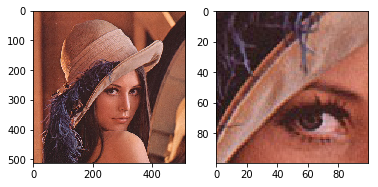

In [9]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = [20, 20]
%matplotlib inline

parte = lenna[200:300, 200:300]

plt.subplot(121)
#plt.imshow(cv2.cvtColor(lenna, cv2.COLOR_BGR2RGB))
plt.imshow(lenna)
plt.subplot(122)
#plt.imshow(cv2.cvtColor(parte, cv2.COLOR_BGR2RGB))
plt.imshow(parte)


## Operaciones con imágenes

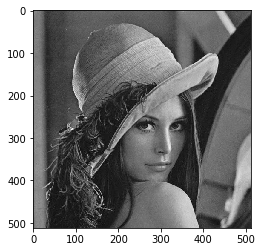

In [10]:
# conversion a escala de grises
lenna.shape
grises = np.sum(lenna, axis=2)/3
plt.imshow(grises, cmap='gray')

(512, 512)


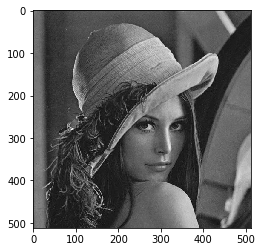

In [11]:
gray = cv2.cvtColor(lenna, cv2.COLOR_BGR2GRAY)
print(gray.shape)
plt.imshow(gray, cmap='gray')

## Convolución y filtrado

El filtrado es una operación fundamental en el campo del procesamiento de imágenes y se basa en la operación de convolución:

### Integral de convolución
![conv](integral.png)
![conv1](conv1.gif)
![con2](conv2.png)

### Convolución en imágenes
![imgconv](conv3.png)


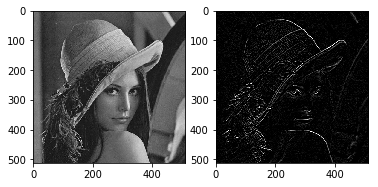

In [12]:
kernel = np.ones((7,7), np.float32) / 25

kernel2 = np.array([[-1,-1,-1], [0,0,0], [1,1,1]], np.float32)
norm = np.sum(kernel2)

kernel2 = kernel2

filtrada = cv2.filter2D(gray, -1, kernel2)

plt.subplot(121)
plt.imshow(gray, cmap='gray')
plt.subplot(122)
plt.imshow(filtrada, cmap='gray')


### Deteccion de bordes


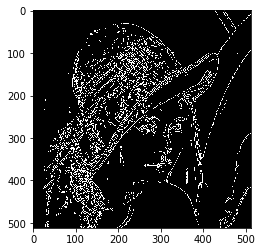

In [13]:
bordes = cv2.Canny(gray, 80, 120)

plt.imshow(bordes, cmap='gray')

## Procesamiento de imágenes
Existen diversas operaciones útiles en el procesamiento de imágenes que tienen algoritmos implementados en OpenCV y pueden ser utilizados directamente.
Se recomienda estudiar los algoritmos para tener un criterio adecuado en su utilización pero también se recomienda usar las funciones que OpenCV facilita pues las mismas están optimizadas.

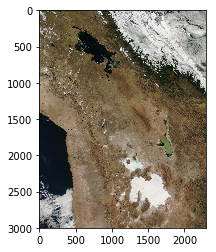

In [143]:
## importamos una imagen
titi_url = "https://eoimages.gsfc.nasa.gov/images/imagerecords/59000/59346/Titicaca.A2002144.1445.250m.jpg"
titi = io.imread(titi_url)
plt.imshow(titi)

In [144]:
# analizamos las dimensiones de la imagen
print(titi.shape)

(3000, 2300, 3)


(820, 950, 3)


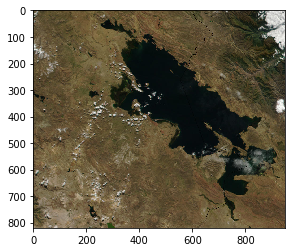

In [145]:
# cortamos la imagen 
lago = titi[180:titi.shape[0]/3, 200:titi.shape[1]/2]
plt.imshow(lago)
print(lago.shape)

## Detección de color
Para poder detectar el lago necesitaremos cambiar de espacio de color en la imagen. Para esto normalmente se usa el espacio HSV:
![hsv](https://henrydangprg.files.wordpress.com/2016/06/hsv_color_solid_cylinder_alpha_lowgamma.png?w=1024&h=768)

![hsv2](https://www.linuxtopia.org/online_books/graphics_tools/gimp_advanced_guide/img150.gif)

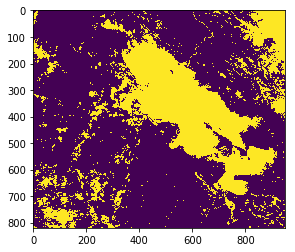

In [146]:
# cambio de espacio de color
lago_hsv = cv2.cvtColor(lago, cv2.COLOR_BGR2HSV)

# definicion de umbrales
#                       h   s    v
rango_bajo = np.array([170/2, 80, 10], dtype=np.uint8)
rango_alto = np.array([210/2, 160, 170], dtype=np.uint8)

mascara = cv2.inRange(lago_hsv, rango_bajo, rango_alto)

mascara = cv2.bitwise_not(mascara)
#plt.subplot(121)
#plt.imshow(lago_hsv, cmap='hsv')
#plt.subplot(122)
plt.imshow(mascara)

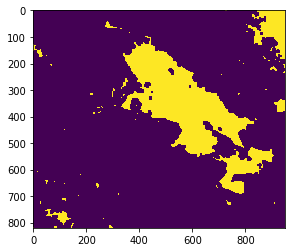

In [147]:
# operaciones morfologicas
# erosion
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(mascara,kernel,iterations = 2)
plt.imshow(erosion)

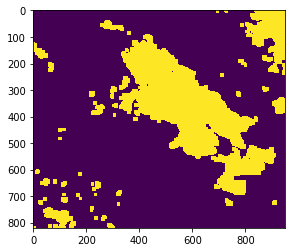

In [148]:
# dilatacion
dilate = cv2.dilate(erosion,kernel,iterations = 3)
plt.imshow(dilate)

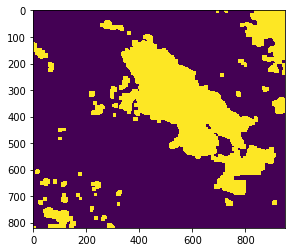

In [149]:
closing = cv2.morphologyEx(dilate, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)

('area aproximada: ', 8539.09375)


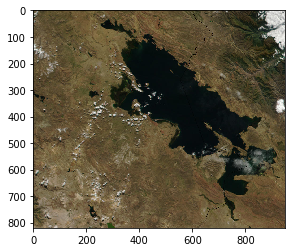

In [155]:
# contornos
_,contours,hierarchy = cv2.findContours(closing, 1, 2)
areas = []
for cnt in contours:
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    areas.append(cv2.contourArea(cnt))
    x,y,w,h = cv2.boundingRect(cnt)
    #cv2.rectangle(lago,(x,y),(x+w,y+h),(0,255,0),2)
    #print(cx,cy, area)
plt.imshow(lago)
area_lago = max(areas) * 0.0625
print("area aproximada: ", area_lago)    #8.372 km2
